In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

## Read the data

In [29]:

import os
from extract_pdf_data import read_pdfs

if not os.path.exists("wef_secondary_enrolment.csv"):
    df = read_pdfs('secondary education')
    df.to_csv("wef_secondary_enrolment.csv", index=False)

In [30]:
from utils import read_wef_file

df = read_wef_file("wef_secondary_enrolment.csv")
df.head()

,country,page_number,score,rank,diff,left,right
0,Albania,83,0.915,128.0,-8.47,91.39,99.86
1,Algeria,85,1.000,1.0,4.07,100.71,104.78
2,Angola,87,0.652,139.0,-22.60,42.29,64.90
3,Argentina,89,1.000,1.0,6.75,113.27,120.03
4,Armenia,91,1.000,1.0,0.01,96.86,96.87


In [31]:
df['rank'].value_counts(dropna=False).head()

rank
1.0      85
NaN       5
139.0     1
121.0     1
107.0     1
Name: count, dtype: int64

In [32]:
df['score'].describe()

count    141.000000
mean       0.973773
std        0.066581
min        0.597000
25%        0.981000
50%        1.000000
75%        1.000000
max        1.000000
Name: score, dtype: float64

In [33]:
dinged = df['score'] < 1
dinged.sum()

np.int64(56)

Here is the distribution of their scores.

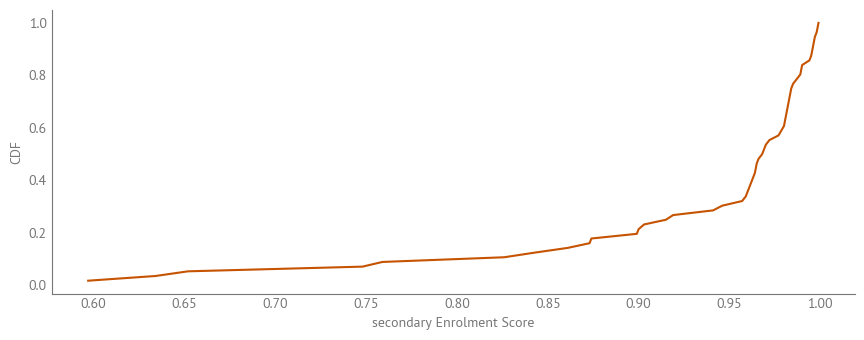

In [34]:
from empiricaldist import Cdf

cdf_score = Cdf.from_seq(df.loc[dinged, 'score'])
cdf_score.plot()
decorate(xlabel='secondary Enrolment Score', ylabel='CDF')

Here is the distribution of differences (female minus male in percentage points) for all countries with valid data.

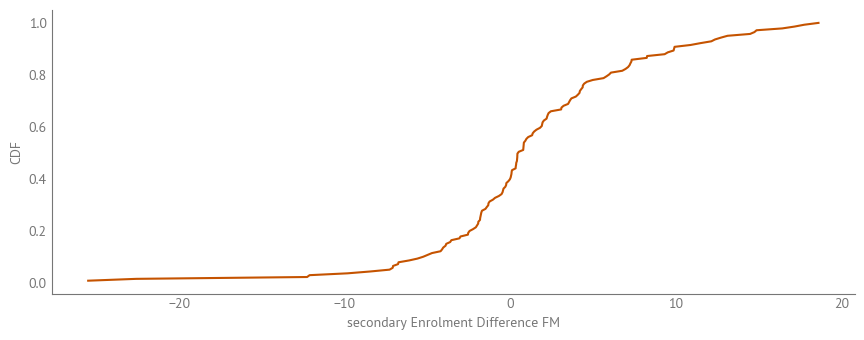

In [35]:
cdf_difference_fm = Cdf.from_seq(df['diff'])
cdf_difference_fm.plot()
decorate(xlabel='secondary Enrolment Difference FM', ylabel='CDF')

In [36]:
subset = df[dinged]
subset.sort_values("diff", ascending=False)

,country,page_number,score,rank,diff,left,right
97,Nicaragua,277,0.999,86.0,-0.04,49.98,50.02
88,Moldova,259,0.999,87.0,-0.13,96.72,96.85
26,Canada,135,0.998,88.0,-0.25,109.21,109.46
59,Hungary,201,0.997,89.0,-0.26,99.56,99.82
117,Singapore,317,0.997,90.0,-0.31,102.88,103.19
70,Kazakhstan,223,0.996,92.0,-0.42,94.21,94.62
129,Thailand,341,0.996,91.0,-0.45,109.29,109.74
121,South Korea,325,0.995,93.0,-0.48,97.67,98.15
99,Nigeria,281,0.989,97.0,-0.54,46.96,47.50
113,Saudi Arabia,309,0.994,94.0,-0.70,119.61,120.31


## Revised scores

The scores are based on ratios, not differences, so let's compute those.

In [37]:
df['ratio'] = df['left'] / df['right']
df['ratio'].describe()

count    141.000000
mean       0.938979
std        0.072358
min        0.596742
25%        0.911508
50%        0.963999
75%        0.986988
max        0.999897
Name: ratio, dtype: float64

Looks like the ratio IS the score.

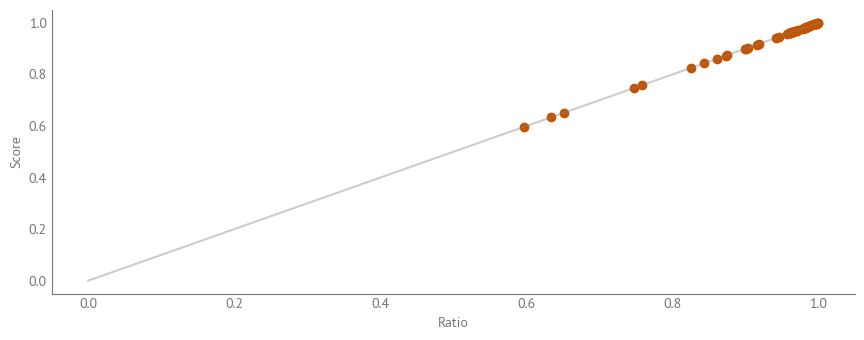

In [38]:
subset = df[dinged]
plt.plot([0, 1], [0, 1], color='gray', alpha=0.4)
plt.scatter(subset['ratio'], subset['score'])
decorate(xlabel='Ratio', ylabel='Score')

So here are the revised, symmetric scores.

In [39]:
df['revised_score'] = df['ratio']
df['revised_score'].describe()

count    141.000000
mean       0.938979
std        0.072358
min        0.596742
25%        0.911508
50%        0.963999
75%        0.986988
max        0.999897
Name: revised_score, dtype: float64

Here's the distribution of revised scores.

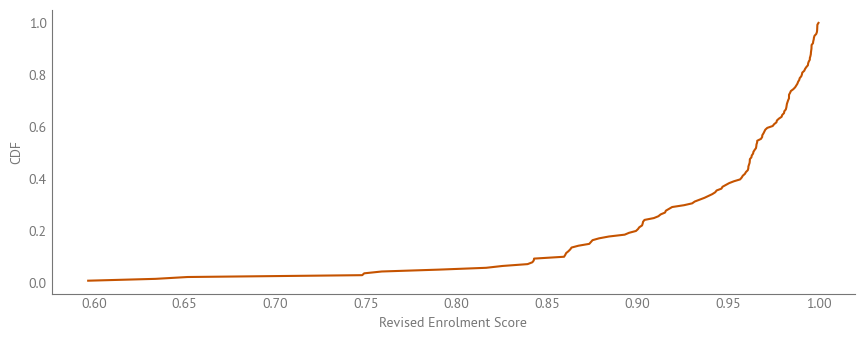

In [40]:
cdf_score = Cdf.from_seq(df['revised_score'])
cdf_score.plot()
decorate(xlabel='Revised Enrolment Score', ylabel='CDF')

Here's the distribution of revised scores, compare to the original.

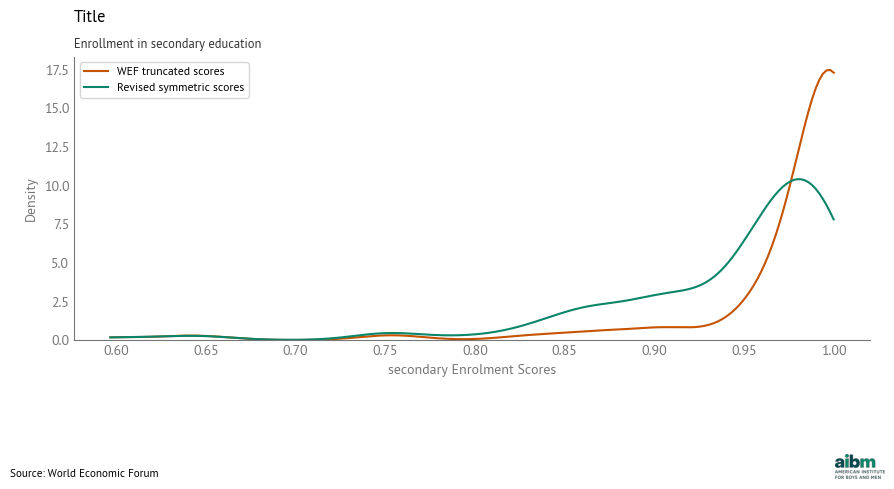

In [41]:
from utils import plot_score_distributions, add_title

plot_score_distributions(df, xlabel='secondary Enrolment Scores')
add_title("Title",
          "Enrollment in secondary education")

In [42]:
revised = df[~dinged].dropna(subset=['ratio']).sort_values('revised_score')
revised.shape

(85, 9)

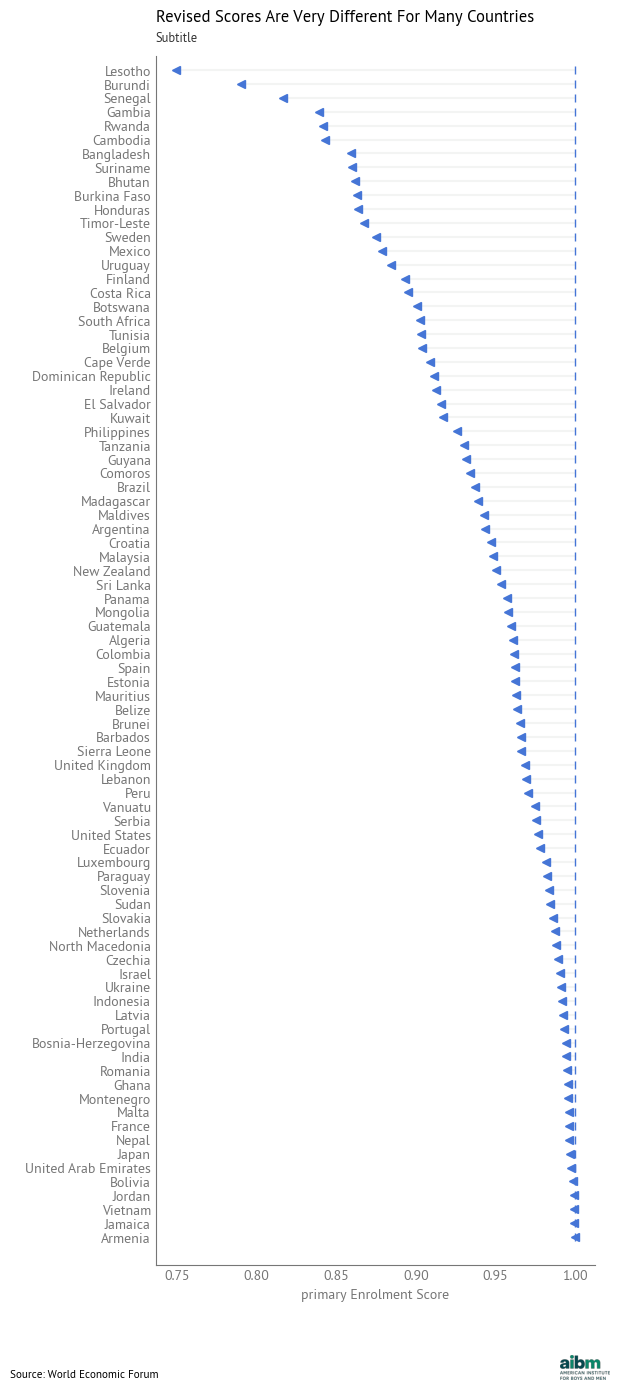

In [43]:
from utils import plot_revised_scores

plot_revised_scores(revised)

And here's the new ranking of countries based on revised scores.

In [44]:
df.reset_index()

,index,country,page_number,score,rank,diff,left,right,ratio,revised_score
0,0,Albania,83,0.915,128.0,-8.47,91.39,99.86,0.915181,0.915181
1,1,Algeria,85,1.000,1.0,4.07,100.71,104.78,0.961157,0.961157
2,2,Angola,87,0.652,139.0,-22.60,42.29,64.90,0.651618,0.651618
3,3,Argentina,89,1.000,1.0,6.75,113.27,120.03,0.943681,0.943681
4,4,Armenia,91,1.000,1.0,0.01,96.86,96.87,0.999897,0.999897
...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,365,0.990,96.0,-0.93,87.94,88.87,0.989535,0.989535
142,142,Vanuatu,367,1.000,1.0,1.94,74.48,76.42,0.974614,0.974614
143,143,Vietnam,369,1.000,1.0,0.07,97.22,97.29,0.999281,0.999281
144,144,Zambia,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Export the results

In [45]:
def make_table(df):
    columns = ['country', 'rank', 'revised_rank', 'score', 'revised_score', 'diff']
    df_sorted = df.sort_values(by='revised_score', ascending=False)
    df_sorted['revised_rank'] = np.arange(1, len(df_sorted)+1)
    table = df_sorted[columns]
    return table

In [46]:
table = make_table(df)
table.to_csv("wef_secondary_enrolment_table.csv", index=False)
table.shape

(146, 6)

In [47]:
table['score'].describe()

count    141.000000
mean       0.973773
std        0.066581
min        0.597000
25%        0.981000
50%        1.000000
75%        1.000000
max        1.000000
Name: score, dtype: float64

In [48]:
from utils import make_weight_table

make_weight_table(table, 'secondary')

## OECD countries

In [50]:
from utils import oecd_country_dict

def select_oecd(df):
    oecd_countries = set(oecd_country_dict.values())
    df_oecd = df.query('country in @oecd_countries').sort_values(by='revised_score')
    return df_oecd

df_oecd = select_oecd(df)
len(df_oecd)

38

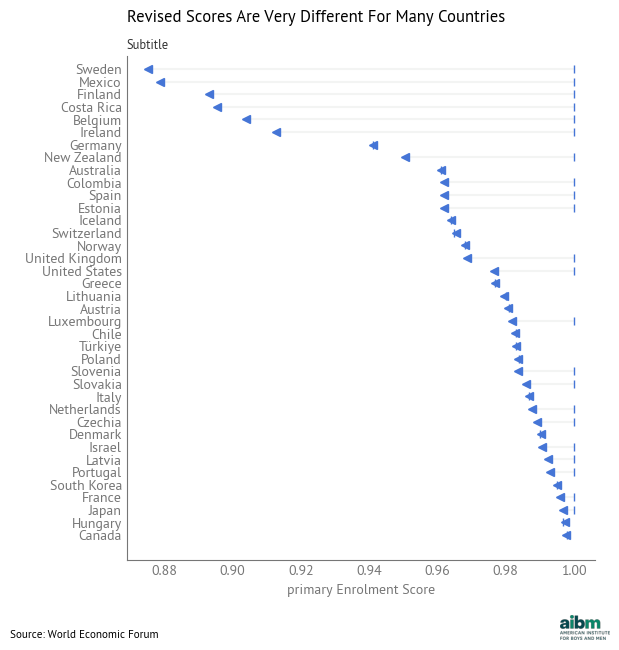

In [51]:
plot_revised_scores(df_oecd)

In [52]:
df.query("country == 'Ireland'")

,country,page_number,score,rank,diff,left,right,ratio,revised_score
64,Ireland,211,1.0,1.0,12.35,129.23,141.58,0.91277,0.91277
